<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03  </font></center></h1>
<h2><center> <font color='black'> Classification problems</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- The accepted submission formats are Colab links or .ipynb files. If you are submitting Colab links please make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**4 April at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).


**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: Mohga Emam</font>&emsp;   <font color='red'>Student ID: C09505</font>


<font color='red'>Name: Rewan Emam</font>&emsp;   <font color='red'>Student ID: C07851</font>




### The homework is divided into four sections and the points are distributed as below:
<pre>
- Classification tasks       -> 8 points
- Improving classification   -> 2 points
__________________________________________
Total                        -> 10 points
</pre>

# 1. Classification tasks (8 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to reasons like retirement, resignation, elimination of a position, personal health, etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RewanEmam/Customer-Segmentation-files/main/HR_Employee_Attrition.csv', sep= ',',header=0)
df.head()

NameError: ignored

## 1.1 Dataset exploration (1.0 points)

**1.1.0.
Plot the correlation of the variables against ```Attrition```. (0.3 points)<br>Make sure you perform necessary preprocessing required for the plot.** 

In [ ]:
#Converting the predictor variable in a binary numeric variable
df['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
df['Attrition'].replace(to_replace='No',  value=0, inplace=True)

df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,-0.004892,0.497855,0.028051,0.299635,0.001904,0.053535,NaN,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.103481,-0.159840,0.015170,0.043494,0.002889,-0.045872,NaN,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.030571,0.007707,-0.032182,0.038153,0.000473,0.007846,NaN,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,-0.003669,-0.017014,0.027473,-0.029251,0.027110,0.006557,NaN,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,-0.011296,0.094961,-0.026084,0.126317,-0.024539,-0.009118,NaN,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,-0.006784,-0.006259,0.037600,0.012594,-0.029548,0.007665,NaN,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.071335,-0.015794,-0.015297,0.022157,-0.002172,0.001330,NaN,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.021476,-0.015271,-0.016322,0.015012,-0.029071,0.034297,NaN,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,1.000000,-0.007157,0.000644,-0.055699,0.002297,-0.012454,NaN,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,-0.007157,1.000000,0.034814,0.149515,-0.017120,0.025873,NaN,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


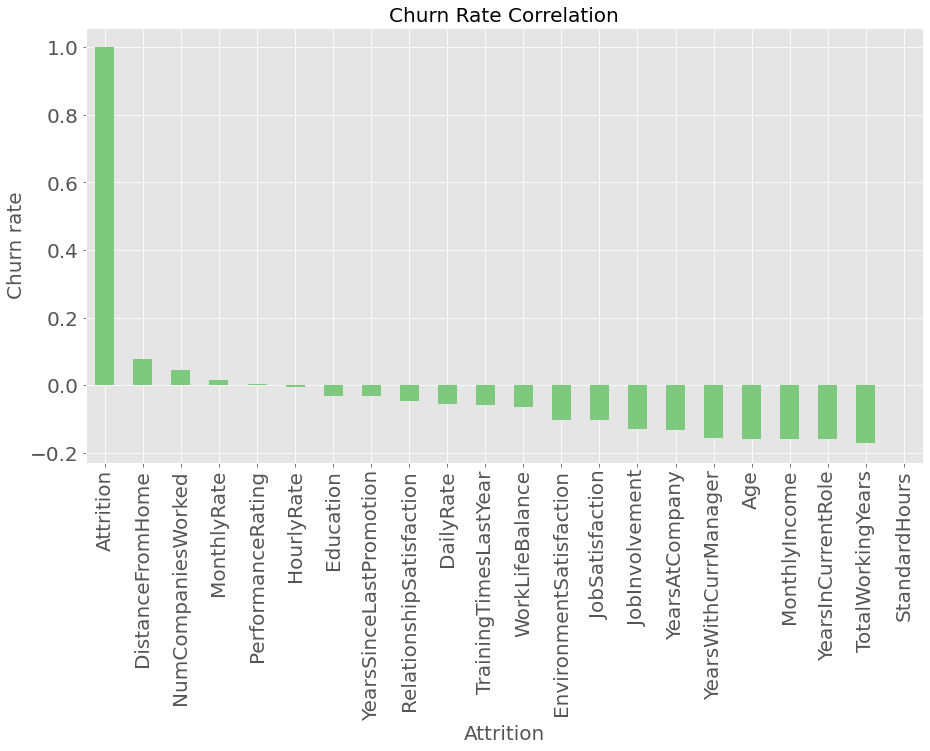

In [ ]:
# Recall the requiredlibraries:
import matplotlib.cm as cm
from sklearn.preprocessing import normalize

plt.figure(figsize=(15,8))
plt.style.use('ggplot')

# Get a color map
my_cmap = cm.get_cmap('Accent')

df.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Churn Rate Correlation',fontsize=20)
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('Churn rate',fontsize=20)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

**1.1.1. Write three interesting observation that you notice. (0.3 points)**

**<font color='red'>Answer 1: First, how much some factors have an effect on the Attrition and other don't such as the Standard Hours [This factor as an example] doesn't have an effect on the Attrition.</font>** 

**<font color='red'>Answer 3:Performance rating factor almost doesn't exist as an effect on this cor-relationship analysis.</font>** 

**<font color='red'>Answer 2: JobSatisfactiion, Age,JobInvolovment, Years with current manager, Monthly Income, Years in the current role, Total working years. All these factors have strong negative correlationship with the Attrition.</font>** 

**1.1.2 Plot a boxplot for ```TotalWorkingYears``` for both Attrition categories. Explain the result. (0.3 points)**

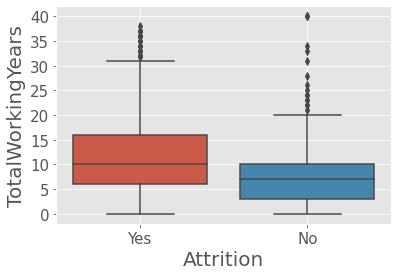

In [ ]:
import seaborn as sns # For creating plots
sns.boxplot(x = df['Attrition'], y = df['TotalWorkingYears'])

# Make the plot more visulaized
plt.xlabel('Attrition', fontsize=20)
plt.ylabel('TotalWorkingYears',fontsize=20)
plt.xticks(np.arange(2), ['Yes', 'No'], fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.grid(True)
plt.show() 

**<font color='red'>Answer:From the plot the customers who do attrition, they have hgher TotalWorkingYears.</font>** 

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.1 points)**

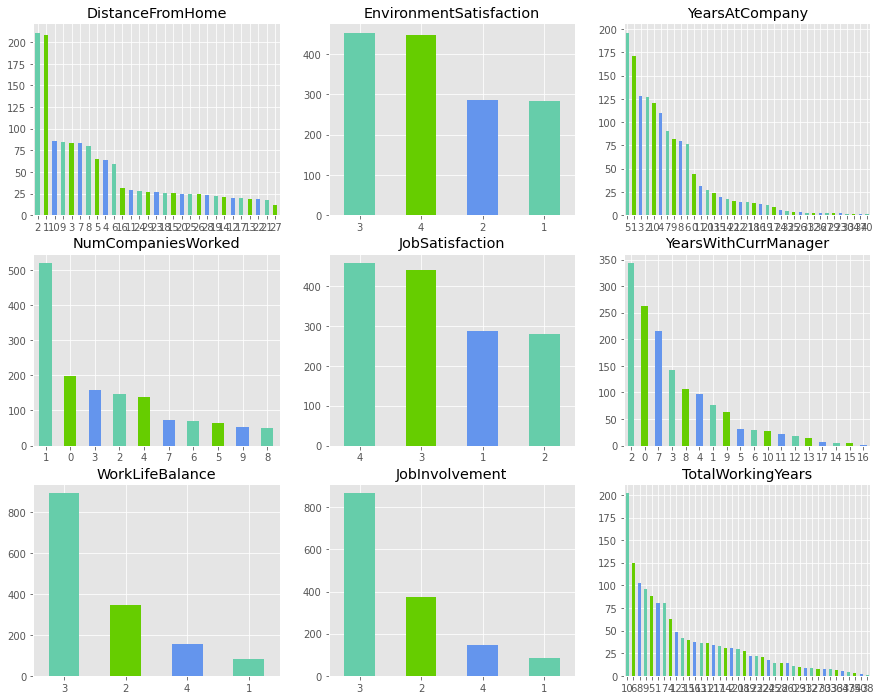

In [ ]:
data = ['DistanceFromHome','NumCompaniesWorked','WorkLifeBalance','EnvironmentSatisfaction',
           'JobSatisfaction','JobInvolvement','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']

colors = [ '#66CDAA','#66CD00',  '#6495ED']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(data):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = colors)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = colors)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = colors)
    ax.set_title(item)

## 1.2 Classification  (7 points)

**1.2.1 We will predict the variable ```Attrition``` by applying different classification algorithms and compare them. But before that we have to split the data into training and test set. And before splitting the dataset, please perform the following preprocessing. (0.5 points)**
* One hot encoding (You probably performed this in ```1.1.0```, in case if you have not)
* Drop three columns with least correlation values. (Use the plot from ```1.1.0```)
* Be a vigilante, and look for columns that has suspicious values. Drop those columns (at least 2 columns), it will not be much of a help in classification.
* Finally normalize the training variables, use the following Z-Score normalizing equation for normalization; <br>

$$x_{norm}= \frac{x -\mu}{\sigma}.$$ <br>

Here, $\mu$ = mean of the training variables, $\sigma$ = standard deviation of the training variables. <br>

What is **Z-score**: It is a a scaling method that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping. Clipping is another technique when you clip off (remove) outliers by visualizing the distribution of your dataset [1]. the following figure shows how Z-score impacts the values, notice the x-axis for both the figures.
<a href="https://ibb.co/XxL5S5y"><img src="https://i.ibb.co/VY9C2CH/img.png" alt="img" border="0"></a><br />
Ref: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [ ]:
import pandas as pd

#Let's convert all the categorical variables into dummy variables
df = pd.get_dummies(df)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,19479,8,3,1,80,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,24907,1,4,4,80,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,4,92,2,3,2090,2396,6,3,2,80,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,23159,1,3,3,80,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,40,3,2,3468,16632,9,3,4,80,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

#TODO: one hot encoding

#TODO: drop three columns with least correlation
del df['PerformanceRating']
del df['MonthlyRate']
del df['HourlyRate']
df.columns.values
#TODO: drop suspicious columns (there should be at least two)
del df['Over18_Y']
del df['StandardHours']

#TODO: normalization
y = df['Attrition'].values
X = df.drop(columns = ['Attrition'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

#TODO: split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**1.2.2 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.4 points)**

In [ ]:
#Let's convert all the categorical variables into dummy variables
df = pd.get_dummies(df)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,3,4,5993,8,1,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,2,2,5130,1,4,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,2,3,2090,6,2,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,3,3,2909,1,3,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,3,2,3468,9,4,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics


model = DT(random_state=0)
#TODO: train the model
model.fit(X_train,y_train)
#TODO: predict on test set
preds = model.predict(X_test)
#TODO: print accuracy
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy of AdaBoostClassifier on test set: ', accuracy)

Accuracy of AdaBoostClassifier on test set:  0.7619047619047619


**1.2.3 Plot the confusion matrix for the predicted values. Why accuracy is not a good metric to use in this case ? (0.4 points)**


Confusion Matrix
[[313  58]
 [ 47  23]]


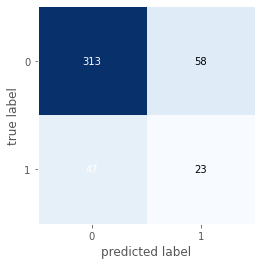

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
y_pred = model.predict(X_test)


print("\nConfusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)



binary = confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

**<font color='red'>Answer: We can see that we have high type 1 error and relatively high type 2 error. Also, some variables have a negative relation to our predicted variable (Attrition), while some have positive relation. Negative relation means that likeliness of Attrition decreases with that variable</font>**

**1.2.4 Formulate a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like? Be creative. You do not require to code for this, just a simple assumption and mathematical proof is necessary. (0.4 points)** <br>
Hint: There are two labels (yes, no) in your data.

**<font color='red'>Answer: I will convert all the categorical data in my dataset into binary numerical data in order to get higher accuracy results. and I will train the model multiple times in order for it to have better predictions. </font>**


**<font color='red'> proof: This will enhance the confusion materix results because we will have better values of the TP,FP,FN,TN. And we use these values in order to calculate the confusion materix as the following:</font>**

**<font color='red'>the confusion materix: [[TP FP][FN TN]]</font>**

**1.2.5 Use export_graphviz from sklearn.tree to visualize the trained decision tree of ```1.2.2```. (0.4 points)**

In [ ]:
!pip3 install graphviz

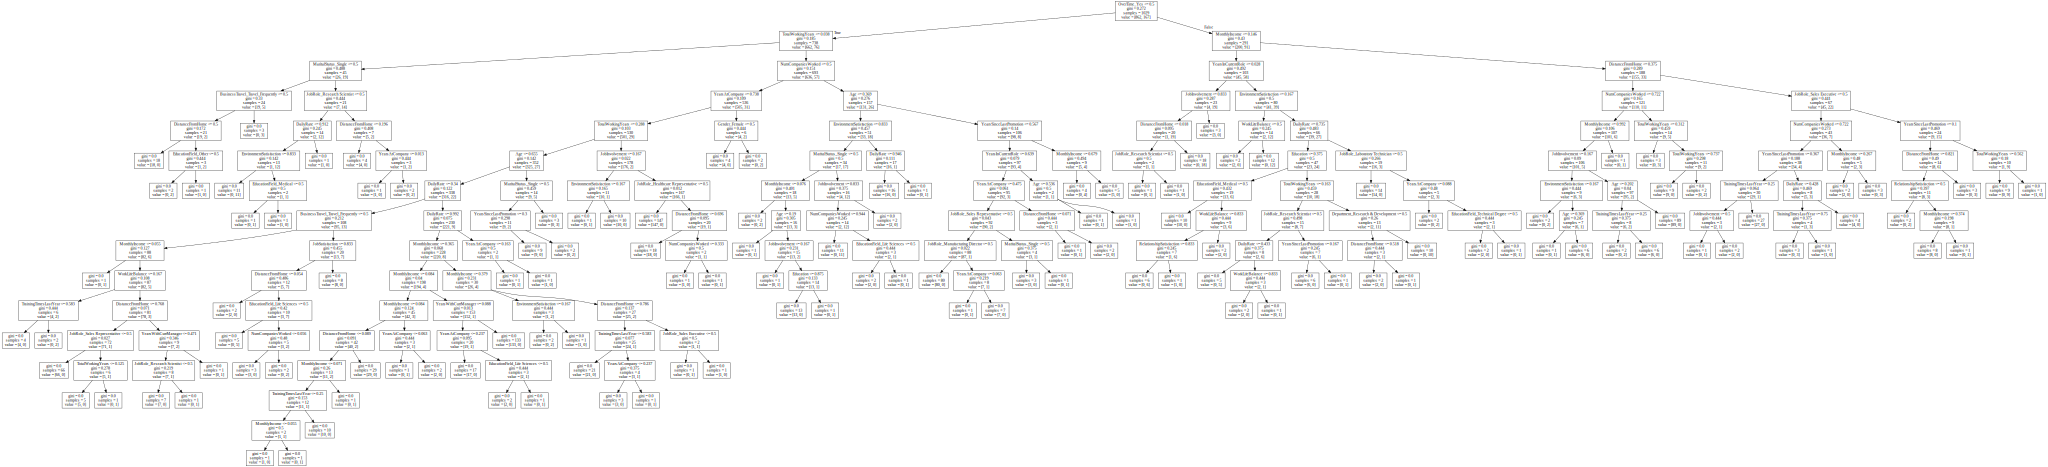

In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(model, out_file=None, feature_names=X.columns))

**1.2.6 Look at the visualization, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

**<font color='red'>Answer: I'd would say that the most important factor is the TotalWorkingYears, and MonthlyIncome.</font>**


**1.2.7 Plot the classification report for the same decision tree. Which evaluation metrics out of precision and recall, would you consider for this specific case-study? Please elaborate your answer. (0.4 points)**

Average precision-recall score: 0.20


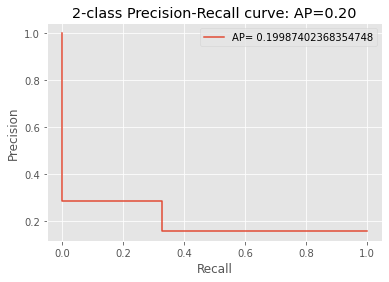

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# Compute precision-recall pairs for different probability thresholds.
disp = plot_precision_recall_curve(model, X_test, y_test,label="AP= "+str(average_precision));
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision));
plt.legend();


**<font color='red'>Answer:</font>** 


**1.2.8 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the phenomenon known as? (0.4 points)**

In [ ]:
from sklearn.metrics import f1_score
y_train_pred = model.predict(X_train)
print(f"F1_score macro of train data: {f1_score(y_train, y_train_pred, average='macro')}, and test data: {f1_score(y_test, y_pred, average='macro')}")
print(f"\nF1_score micro of train data: {f1_score(y_train, y_train_pred, average='micro')}, and test data: {f1_score(y_test, y_pred, average='micro')}")
print(f"\nF1_score weighted of train data: {f1_score(y_train, y_train_pred, average='weighted')}, and test data: {f1_score(y_test, y_pred, average='weighted')}")

F1_score macro of train data: 1.0, and test data: 0.5804984553501055

F1_score micro of train data: 1.0, and test data: 0.7619047619047619

F1_score weighted of train data: 1.0, and test data: 0.7687856907740764


**<font color='red'>Answer: This is called underfitting because the model performs well on the training data but doesn't perform as good on the test data.</font>**

**1.2.9 Use cross validation score to ensure that our model is generalizing well. Try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.5 points)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import std

best_score = 0
best_depth = 0

for i in range(2,12):
    clf = DT(max_depth=i, random_state = 0)
    #TODO: Perform 5-fold cross validation. 
    cv = KFold(n_splits = 5, shuffle = True, random_state = 1)
    #set scoring metrics to f1
    scores = cross_validate(clf, X, y, cv=3,scoring=('f1'),return_train_score=True)
    #TODO: calculate the mean score (f1)
    mean_score = scores['test_score']
    #TODO: compare the mea scores to find the best depth
    print('Mean score', mean_score)
    best_depth = mean_score
print('\n The best tree depth is: ', best_depth )

Mean score [0.29357798 0.35087719 0.31578947]
Mean score [0.16666667 0.2745098  0.31858407]
Mean score [0.36220472 0.38983051 0.40625   ]
Mean score [0.35772358 0.41935484 0.3220339 ]
Mean score [0.3125     0.46268657 0.390625  ]
Mean score [0.288      0.47142857 0.39416058]
Mean score [0.36986301 0.41891892 0.34532374]
Mean score [0.37086093 0.38356164 0.39716312]
Mean score [0.36363636 0.38926174 0.35211268]
Mean score [0.37908497 0.44       0.38410596]

 The best tree depth is:  [0.37908497 0.44       0.38410596]


**1.2.10 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.4 points)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


svm_model = SVC(random_state=0)

#TODO: train the model

svm_model.fit(X_train,y_train)
#TODO: predict on test set
preds = svm_model.predict(X_test)
#TODO: calculate the metrics
confusion_materix = metrics.confusion_matrix(y_test,preds)


TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.8684807256235828
Recall:  0.8699763593380615
Precision:  0.9919137466307277
F1_score:  0.9269521410579347
AUC:  <function auc at 0x7f07c94394d0>


**1.2.11 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.4 points)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

#TODO: train the model
lr.fit(X_train, y_train)
#TODO: predict on test set
lr.predict(X_test)
#TODO: calculate the metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))


print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8684807256235828
Recall:  0.8699763593380615
Precision:  0.9919137466307277
F1_score:  0.9269521410579347
AUC:  <function auc at 0x7f07c94394d0>


**1.2.12 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.5 points)**


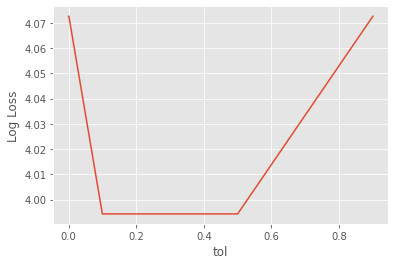

Best Tolerance, tol, Value:  0.5


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

log_loss_list = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    
    #TODO: initialize the model
    lr_model = LR(tol=tol)
    #TODO: train the model
    result = lr_model.fit(X_train, y_train)
    #TODO: predict on test set
    probs = lr_model.predict(X_test)
    #TODO: calculate logloss
    loss = log_loss(y_test, probs)
    #TODO: use log_loss list to store the different logloss for different tol
    log_loss_list.append(loss)
tol = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
plt.plot(tol, log_loss_list)
plt.ylabel("Log Loss")
plt.xlabel("tol")
plt.show()


#Findidng out the best tolerance value
min_index=(log_loss_list.index(min(log_loss_list)))
print("Best Tolerance, tol, Value: ", tol[min_index])

**1.2.13 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.4 points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

#TODO: train the model
rf_model.fit(X_train, y_train)
#TODO: predict on test set
probs = rf_model.predict(X_test)
#TODO: classification report
metrics.classification_report(y_test, probs)
accuracy = metrics.accuracy_score(y_test, probs)
print('Accuracy of Random Forest classifier on test set: ', accuracy)

confusion_materix = metrics.confusion_matrix(y_test,preds)
print('Confusion materix of Random Forest classifier on test set: \n', confusion_materix)


Accuracy of Random Forest classifier on test set:  0.8526077097505669
Confusion materix of Random Forest classifier on test set: 
 [[368   3]
 [ 55  15]]


**1.2.14 Use the model from ```1.2.13```, calculate the predicted probability on test set. Threshold the probabilities such that it will output the class 'No'  only if the probability is 70% or higher. Otherwise, it will predict 'Yes'. (0.3 points)**


In [ ]:
#TODO: predict probability on test set
y_pred = rf_model.predict_proba(X_test)
#TODO: threshold probability

y_pred_threshold = pd.DataFrame(y_pred)

if y_pred_threshold > 0.70:
  print('No')
else:
  print('yes')



NameError: ignored

**1.2.15 Print the classification report agian. Do you think there were some improvements regarding the classification for class Yes? Explain your answer briefly. (0.4 points)**

In [ ]:
print(metrics.classification_report(y_test, y_pred_threshold))

**<font color='red'>Answer:</font>** 

**1.2.16 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.3 points)**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

#TODO: train the model
xgb_model.fit(X_train, y_train)
#TODO: predict on test set
y_pred = xgb_model.predict(X_test)
#TODO: calculate the metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8684807256235828
Recall:  0.8699763593380615
Precision:  0.9919137466307277
F1_score:  0.9269521410579347
AUC:  <function auc at 0x7f07c94394d0>


**1.2.17 For unbalanced datasets, choose the best classifier (based on evaluation metrics that seems good for this case-study) and plot its feature importances in decreasing order. Were the 3 most important features as you expected, you can use ```1.2.5``` as reference? Please explain why. (0.5 points)**

In [ ]:
#TODO: choose a model
from sklearn.ensemble import AdaBoostClassifier
#TODO: train the model
model = AdaBoostClassifier()
model.fit(X_train,y_train)
#TODO: predict on test set
preds = model.predict(X_test)
#TODO: calculate the metrics
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy of AdaBoostClassifier on test set: ', accuracy)
#TODO: feature importance calculation
confusion_matrix = metrics.confusion_matrix(y_test, preds)

TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)





Accuracy of AdaBoostClassifier on test set:  0.8526077097505669
Accuracy:  0.8684807256235828
Recall:  0.8699763593380615
Precision:  0.9919137466307277
F1_score:  0.9269521410579347


** italicized text<font color='red'>Answer: I choose it for better results and higher accuracy.</font>**

# 2. Improving classification (2 points)

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer: It's crucial to try both techniques [Oversampling & Downsampling] for unbalanced datasets. Then check the results to see which one of these two gives us better rresults. Although that the oversampling techniques cases overfitting, when it comes to the downsampling could case loss of the information. But still this impletation importnat with unbalanced datasets.</font>** 

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.2 points)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#TODO: apply oversampling
# Classes count
count_class_0, count_class_1 = df['Attrition'].value_counts()

# Divide df by class
df_class_0 = df[df['Attrition'] == 0]
df_class_1 = df[df['Attrition'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Attrition.value_counts())

df_test_over.Attrition.value_counts().plot(kind='bar', title='Count (target)',color=colors);

In [ ]:
#Convertin the predictor variable in a binary numeric variable
df_test_over['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
df_test_over['Attrition'].replace(to_replace='No',  value=0, inplace=True)
df_test_over.head()

Feature = df_test_over[['DistanceFromHome','NumCompaniesWorked','WorkLifeBalance','EnvironmentSatisfaction',
           'JobSatisfaction','JobInvolvement','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']]
Feature = pd.concat([Feature,pd.get_dummies(df_test_over['JobInvolvement'])], axis=1)
X = Feature[['DistanceFromHome','NumCompaniesWorked','WorkLifeBalance','EnvironmentSatisfaction',
           'JobSatisfaction','JobInvolvement','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']]
#X

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

# Target label, 
y = df_test_over['Attrition']
#y

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

#TODO: train the model
lr.fit(X_train, y_train)
#TODO: predict on test set
lr.predict(X_test)
#TODO: calculate the metrics

confusion_materix = metrics.confusion_matrix(y_test, y_pred)

TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))


print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)

**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.2 points)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#TODO: apply undersampling

colors = [ '#66CDAA',  '#6495ED']

# class 1: minority class
# class 0: majority class
# samples of the majority class

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Attrition.value_counts())

df_test_under.Attrition.value_counts().plot(kind='bar', title='Count (target)',color=colors);

In [ ]:
#Convertin the predictor variable in a binary numeric variable
df_test_under['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
df_test_under['Attrition'].replace(to_replace='No',  value=0, inplace=True)
df_test_under.head()

Feature = df_test_over[['DistanceFromHome','NumCompaniesWorked','WorkLifeBalance','EnvironmentSatisfaction',
           'JobSatisfaction','JobInvolvement','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']]
Feature = pd.concat([Feature,pd.get_dummies(df_test_over['JobInvolvement'])], axis=1)
X = Feature[['DistanceFromHome','NumCompaniesWorked','WorkLifeBalance','EnvironmentSatisfaction',
           'JobSatisfaction','JobInvolvement','YearsAtCompany','YearsWithCurrManager','TotalWorkingYears']]


from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# Target label, 
y = df_test_over['Attrition']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

#TODO: train the model
lr.fit(X_train, y_train)
#TODO: predict on test set
lr.predict(X_test)
#TODO: calculate the metrics

confusion_materix = metrics.confusion_matrix(y_test, y_pred)

TP = confusion_materix[0][0]
FP = confusion_materix[0][1] 
FN = confusion_materix[1][0]
TN = confusion_materix[1][1]

acc = (TP+TN)/(TP+FP+FN+TN)
rec = TP/(TP+FN)
prec = TP/(TP+FP)
f1_score = 2*((rec*prec)/(rec+prec))


print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)

**2.6 Which one performed better between over and under sampling (0.2 points)** 

<font color='red'> **Answer: Both of the techniques gave me the same results, so applying any of them will be sufficient!!**</font>

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>



## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font>